In [5]:
using LinearAlgebra
include("zpalgebra.jl");
using Plots

In [6]:
function measure!(g,stabs,p)
    l=size(stabs,1)÷2
    syndromes=mod.(([-g[l+1:end];g[1:l]]'*stabs)',p)
    noncommutingStabs=findall(x->x>0,syndromes)
    if length(noncommutingStabs)==0
        return stabs
    elseif length(noncommutingStabs)==1
        stabs[:,noncommutingStabs[1]]=g
        return stabs
    else
        k=noncommutingStabs[1]
        for i in noncommutingStabs[2:end]
            alpha=mod(invmod(syndromes[k],p)*(p-syndromes[i]),p)
            stabs[:,i]=mod.(stabs[:,i]+stabs[:,k]*alpha,p)
        end
        stabs[:,noncommutingStabs[1]]=g
        return stabs
    end
end

function entanglementProfile(stabs,p)
    l=size(stabs,1)÷2
    es=zeros(l-1)
    for i=1:l-1
        es[i]=rank_p!(vcat(stabs[1:i,:],stabs[l+1:l+i,:]),p)-i
    end
    return es
end



entanglementProfile (generic function with 1 method)

In [7]:
# small example
# stabs=zeros(T,2l,l)
# stabs[1:l,1:l]=Matrix(1I,l,l)
# g=zeros(T,2l)
# g[l+1]=0x01
# g[l+2]=0x01

# measure(g,stabs,p)

### $Z^\dagger Z$-$X$ example

In [10]:
T=Int8
p::T=3
q=0.5
l=32

depth=2l
avgNum=10000

singleXs=zeros(T,2l,l)
singleXs[1:l,1:l]=Matrix(1I,l,l)


ZZs=zeros(T,2l,l-1)
ZZs[l+1:l+(l-1),1:l-1]=-Matrix(1I,l-1,l-1)
ZZs[l+2:l+l,1:l-1]+=Matrix(1I,l-1,l-1)


ep=zeros(l-1)

for r in 1:avgNum
    stabs=zeros(T,2l,l)
    stabs[1:l,1:l]=Matrix(1I,l,l)

    for t=1:depth
        for i=1:l
            if rand()<q
                stabs=measure!(singleXs[:,i],stabs,p)
            end
        end
        for i=1:l-1
            if rand()<1-q
                stabs=measure!(ZZs[:,i],stabs,p)
            end
        end
    end
    ep+=entanglementProfile(stabs,p)

end
ep=ep./avgNum;


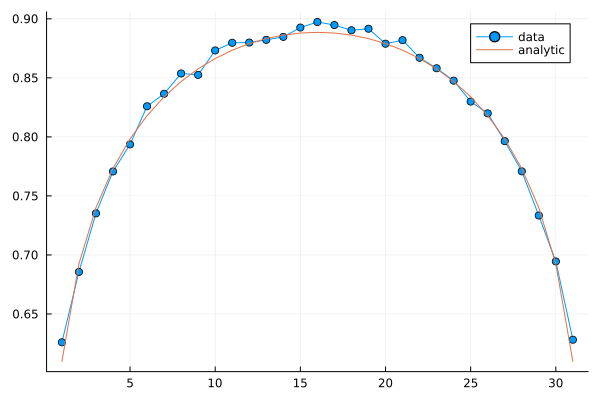

In [11]:
function f(x,l,a,b)
    return a*log(l/π*sin(π*x/l))+b
end
xaxis=collect(1:1:l-1)

plt=plot(xaxis,ep,marker=:circle,label="data")
plot!(plt,xaxis,f.(xaxis,l,.12,0.61),label="analytic")

### $ZZ$-$X$ example

In [12]:
T=Int8
p::T=3
q=0.5
l=32

depth=2l
avgNum=10000

singleXs=zeros(T,2l,l)
singleXs[1:l,1:l]=Matrix(1I,l,l)


ZZs=zeros(T,2l,l-1)
ZZs[l+1:l+(l-1),1:l-1]=Matrix(1I,l-1,l-1)
ZZs[l+2:l+l,1:l-1]+=Matrix(1I,l-1,l-1)


ep=zeros(l-1)

for r in 1:avgNum
    stabs=zeros(T,2l,l)
    stabs[1:l,1:l]=Matrix(1I,l,l)

    for t=1:depth
        for i=1:l
            if rand()<q
                stabs=measure!(singleXs[:,i],stabs,p)
            end
        end
        for i=1:l-1
            if rand()<1-q
                stabs=measure!(ZZs[:,i],stabs,p)
            end
        end
    end
    ep+=entanglementProfile(stabs,p)

end
ep=ep./avgNum;


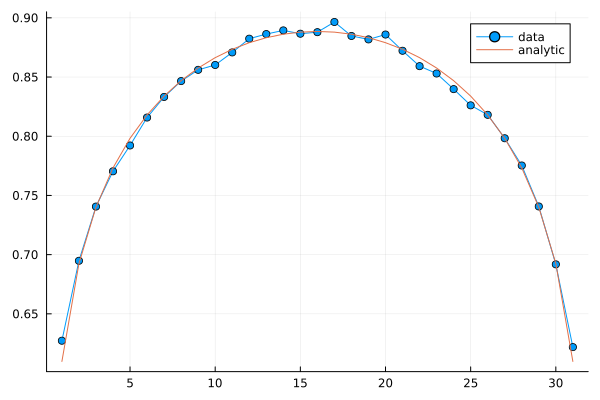

In [13]:
function f(x,l,a,b)
    return a*log(l/π*sin(π*x/l))+b
end
xaxis=collect(1:1:l-1)

plt=plot(xaxis,ep,marker=:circle,label="data")
plot!(plt,xaxis,f.(xaxis,l,.12,0.61),label="analytic")